<a href="https://colab.research.google.com/github/jamienjoroge/MachineLearning/blob/master/Copy_of_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import math
import quandl
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
style.use('ggplot')

In [0]:
df = quandl.get('WIKI/GOOGL', api_key ='bNSuk7inWpKuJbLrWpDc')

In [0]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [0]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

In [0]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [0]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [0]:
forecast_col = 'Adj. Close'

In [0]:
df.fillna(-99999, inplace=True)

In [0]:
forecast_out = int(math.ceil(0.01*len(df)))

In [0]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [0]:
X = np.array(df.drop(['label'],1))

In [0]:
X = preprocessing.scale(X)

In [0]:
X =  X[:-forecast_out]

In [0]:
X_lately = X[-forecast_out:]

In [0]:
df.dropna(inplace=True)

In [0]:
y = np.array(df['label'])

In [0]:
y = np.array(df['label'])

In [0]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [0]:
clf = LinearRegression(n_jobs=-1)

In [0]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
accuracy = clf.score(X_test, y_test)

In [0]:
forecast_set = clf.predict(X_lately)

In [0]:
print(forecast_set, accuracy, forecast_out)

[1076.6658819  1091.27521399 1105.25009848 1099.82251008 1093.32679449
 1090.71543771 1089.14678538 1086.10654657 1079.92772316 1075.56911733
 1073.27350258 1092.8654687  1111.2299435  1115.61347738 1130.53442572
 1134.52928863 1133.12691513 1130.68711446 1132.45184872 1150.91765757
 1149.93843761 1160.02881998 1156.5800783  1164.38871116 1184.73390596
 1197.01732874 1191.22527661 1203.22920596 1208.76474991 1206.83834881
 1197.60877682 1203.1621651  1201.82374322 1137.39016402 1084.26894838] 0.9778194920802854 35


In [0]:
df['Forecast'] = np.nan

In [0]:
last_date = df.iloc[-1].name

In [0]:
last_unix = last_date.timestamp()

In [0]:
one_day = 86400

In [0]:
next_unix = last_unix + one_day

In [0]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
  

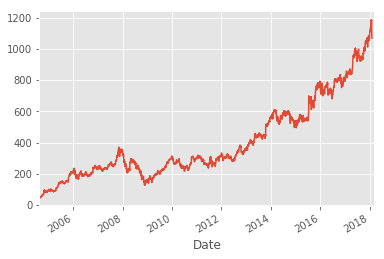

In [0]:
df['Adj. Close'].plot()

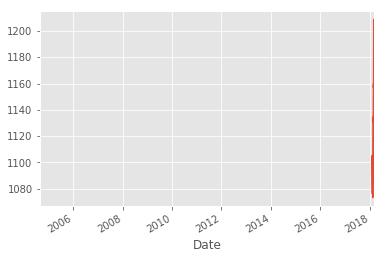

In [0]:
df['Forecast'].plot()

No handles with labels found to put in legend.


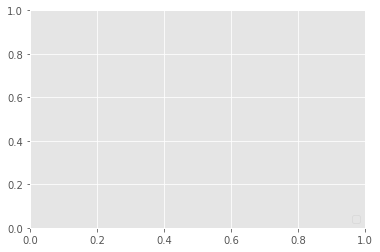

In [0]:
plt.legend(loc=4)

Text(0.5, 0, 'Date')

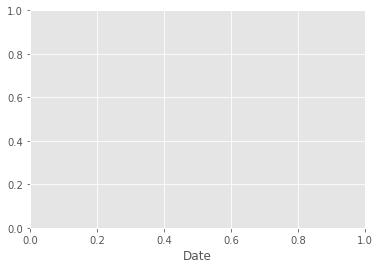

In [0]:
plt.xlabel('Date')

Text(0, 0.5, 'Price')

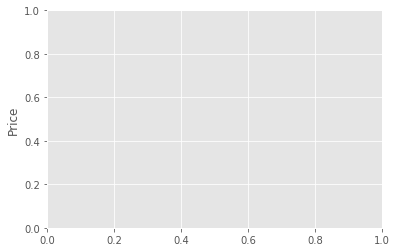

In [0]:
plt.ylabel('Price')

In [0]:
plt.show()